In [97]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
def load_data():
    casos = pd.read_csv(
        '../data/indicadores/visceral/indicador_14_total_casos_novos_municipio_infeccao.csv'
    ).set_index('CO_MN_INF')
    taxa = pd.read_csv(
        '../data/indicadores/visceral/indicador_15_taxa_incidencia_municipio_infeccao.csv'
    ).set_index('CO_MN_INF')      
    # *.shp vai utilizar o arquiv .shx e .dbf 
    shapes = gpd.read_file('../data/BR_Municipios_2020.shp')
    shapes.CD_MUN = shapes.CD_MUN.apply(lambda x: x[0:6])
    shapes.CD_MUN = shapes.CD_MUN.astype(int)
    shapes = shapes.set_index('CD_MUN')
    taxa['geometry'] = taxa.index.map(shapes['geometry'].to_dict())
    
    pop = pd.read_csv('../data/processed/populacao.csv')
    mun = pd.read_csv('../data/processed/municipios.csv')  
    return casos, taxa, pop, mun 
casos, taxa, pop, mun = load_data()
anos = casos.columns
casos['estado'] = casos.index.map(mun[['ibge_code', 'estado']].set_index('ibge_code')['estado'].to_dict())

- Em um período de 13 anos o Brasil notificou um total de x casos de LV, desse total os cinco estados que mais contribuíram foram Maranhão, Minas Gerais, Ceará, Pará e Tocantins, nesta ordem, representando juntos aproximadamente 63% do total de casos no país em todo o período.
- A distribuição de casos de LV por ano no Brasil não teve alterações bruscas, mas o ano de 2017 foi o que teve mais notificações registradas de LV, sendo x casos representando 9,36 % do total de casos entre 2007 e 2019. 
- No ano de 2017 observa-se que somente 5 estados juntos contribuíram com 69% das notificações, sendo Minas Gerais (750), Maranhão (714), Pará (511), Ceará (323) e Bahia (254)
(não esquecer de citar que nos anos anteriores poderia haver subnotificação, avaliar isso)

In [196]:
casos[['2017','estado']].groupby('estado').sum().sort_values(by='2017',ascending=False).head(5)

,2017
estado,
Minas Gerais,750.0
Maranhão,714.0
Pará,511.0
Ceará,323.0
Bahia,254.0


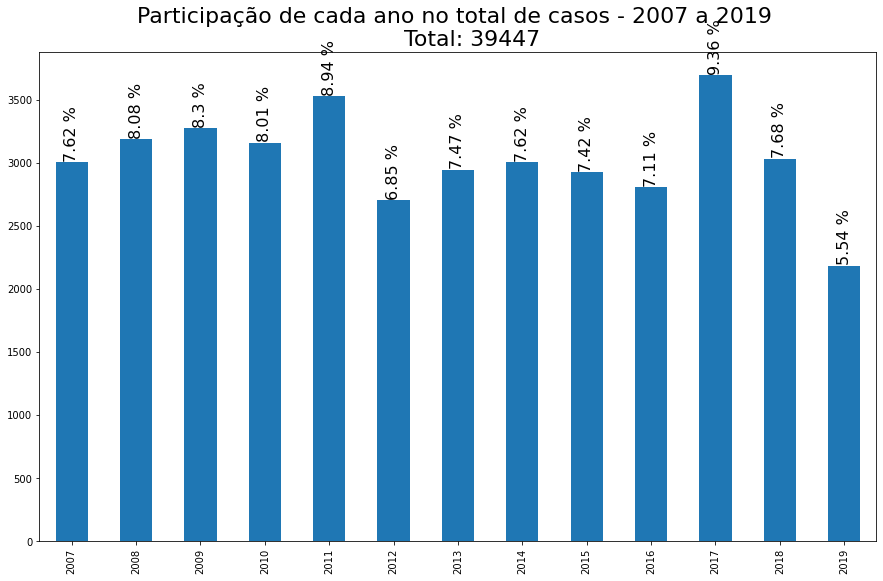

In [155]:
rank = casos[anos].sum()
ax = rank.plot(
    kind='bar',
    figsize=(15,9)
)
ax.set_title(
    """Participação de cada ano no total de casos - 2007 a 2019 
    Total: {}""".format(int(casos[anos].sum().sum())),
    fontdict = {'fontsize':22}
)
rects = ax.patches
# Make some labels.
labels = [f"{round(i,2)} %" for i in (rank / casos[anos].sum().sum() * 100).values]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, 
        label, 
        ha='center', 
        rotation='vertical', 
        va='bottom',
        color='black',
        fontsize=16
    )
plt.show()

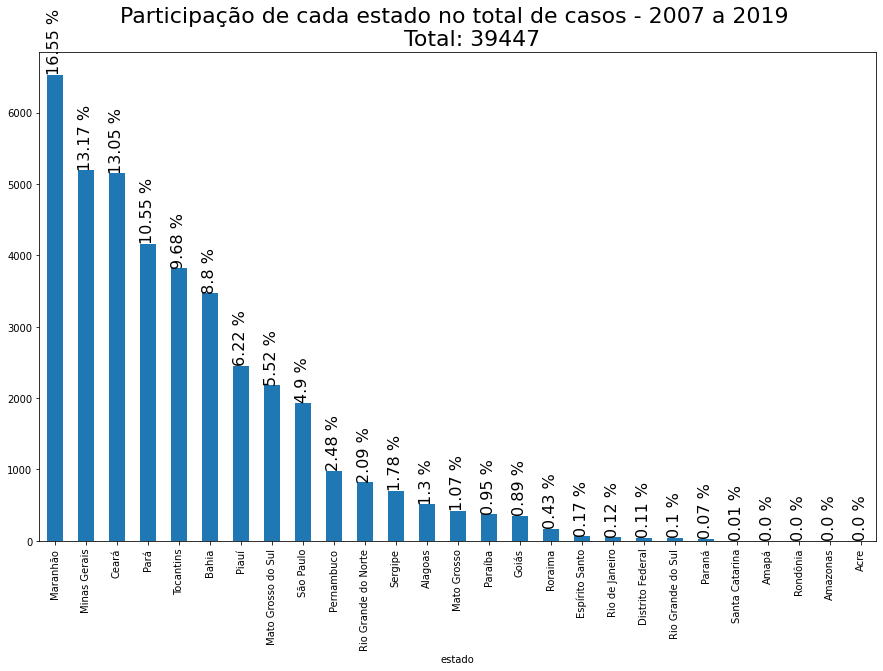

In [146]:
rank = casos.groupby('estado').sum().sum(axis=1).sort_values(ascending=False)
ax = rank.plot(
    kind='bar',
    figsize=(15,9)
)
ax.set_title(
    """Participação de cada estado no total de casos - 2007 a 2019 
    Total: {}""".format(int(casos[anos].sum().sum())),
    fontdict = {'fontsize':22}
)
rects = ax.patches
# Make some labels.
labels = [f"{round(i,2)} %" for i in (rank / casos[anos].sum().sum() * 100).values]

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(
        rect.get_x() + rect.get_width() / 2, height + 5, 
        label, 
        ha='center', 
        rotation='vertical', 
        va='bottom',
        color='black',
        fontsize=16
    )
plt.show()

In [172]:
top15_last3yr = casos[['2017','2018','2019','estado']].groupby('estado').sum().sum(axis=1).sort_values(ascending=False).head(15).index


<AxesSubplot:xlabel='estado'>

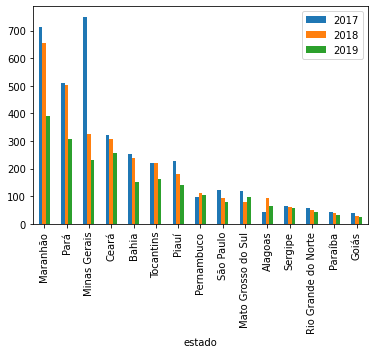

In [175]:
casos[['2017','2018','2019','estado']].groupby('estado').sum().loc[top15_last3yr].plot(kind='bar')

In [9]:
idx = pop.loc[pop.MUNIC_RES.astype('string').str.startswith('15'), 'MUNIC_RES']
pop = pop.set_index('MUNIC_RES')

In [48]:
pop.loc[idx[((pop.loc[idx, :] < 5000).sum(axis=1) > 0).values].values,:]

,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
MUNIC_RES,,,,,,,,,,,,,
150125,3812.0,3935.0,3947.0,3434.0,3405.0,3379.0,3340.0,3303.0,3267.0,3233.0,3200.0,3310.0,3286.0
150746,4715.0,4949.0,5038.0,5265.0,5360.0,5451.0,5608.0,5703.0,5795.0,5884.0,5970.0,6059.0,6139.0


- verificar
    - os dados devem ser estacionários